In [12]:
# импортируем библиотеки

import numpy as np
import matplotlib.pyplot as plt
import sklearn
from numpy import *
import urllib

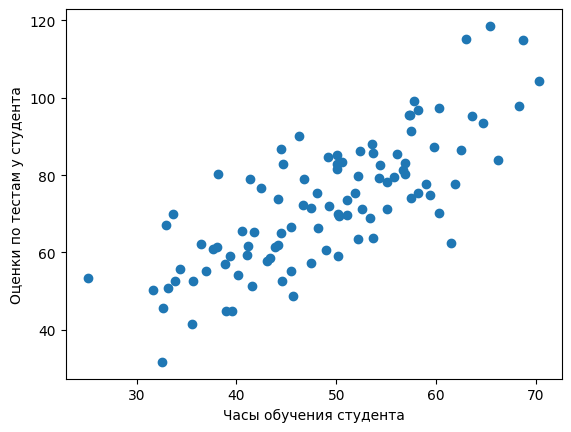

In [13]:
# загружаем данные
urllib.request.urlretrieve("https://raw.githubusercontent.com/CC-MNNIT/2018-19-Classes/master/MachineLearning/2018_08_22_Logical-Rhythm-2/data.csv", "data.csv")
data = genfromtxt('data.csv', delimiter=',')

# получаем значения x и y
x = array(data[:,0])
y = array(data[:,1])

# нарисуем dataset
plt.scatter(x,y)
plt.xlabel('Часы обучения студента')
plt.ylabel('Оценки по тестам у студента')
plt.show()

In [14]:
# импортируем библиотеку
from sklearn.linear_model import LinearRegression

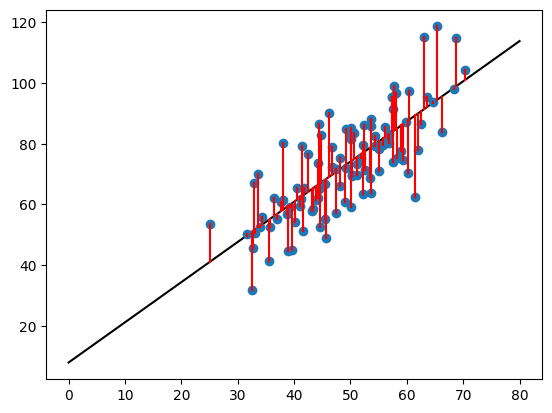

In [15]:
# проводим инициализацию модели
model=LinearRegression(fit_intercept=True)
model.fit(x[:,np.newaxis], y)

xfit=np.linspace(0,80,100)
yfit=model.predict(xfit[:, np.newaxis])
plt.plot(xfit,yfit, color="black")
plt.plot(x,y, 'o')

plt.plot(np.vstack([x,x]), np.vstack([y, model.predict(x[:, np.newaxis])]), color="red");

In [16]:
# печатаем полученные коэффициенты для линейной регрессии
print("Параметры:", model.coef_, model.intercept_)
print("Коэффициент b из формулы y=a+bx:", model.coef_[0])
print("Коэффициент a из формулы y=a+bx:", model.intercept_)
print(model.score(x[:,np.newaxis], y))

Параметры: [1.32243102] 7.991020982270399
Коэффициент b из формулы y=a+bx: 1.3224310227553597
Коэффициент a из формулы y=a+bx: 7.991020982270399
0.598655791538662


In [17]:
model

LinearRegression()

In [18]:
type(model)

sklearn.linear_model._base.LinearRegression

In [19]:
import pickle

with open('my_model.h5', 'wb') as file:
  pickle.dump(model, file)

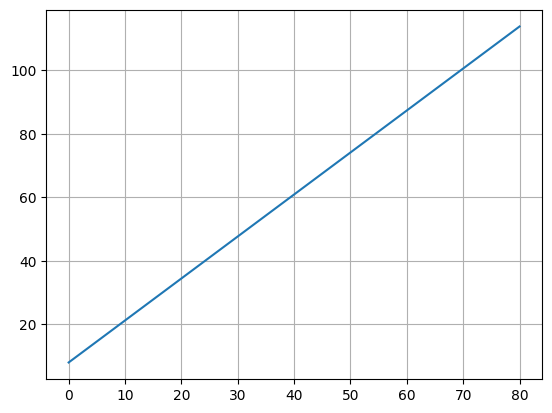

In [7]:
x = np.linspace(0, 80, 100)
y = model.coef_[0]*x + model.intercept_

fig, ax = plt.subplots()

ax.plot(x, y)
ax.grid()

plt.show()

1.0
1.0


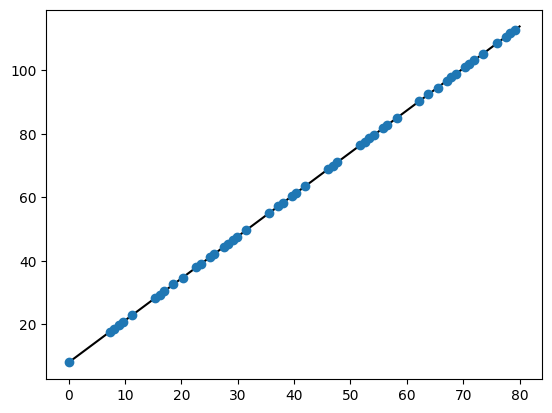

In [8]:
# подключим разделение на обучающую / тестовую выборку (другими словами работаем с sample)
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.5, random_state=0)
model=LinearRegression(fit_intercept=True)
model.fit(x_train[:,np.newaxis], y_train)

xfit=np.linspace(0,80,100)
yfit=model.predict(xfit[:, np.newaxis])
plt.plot(xfit,yfit, color="black")
plt.plot(x_train,y_train, 'o')
# The following will draw as many line segments as there are columns in matrices x and y
plt.plot(np.vstack([x_train,x_train]), np.vstack([y_train, model.predict(x_train[:, np.newaxis])]), color="red");
print(model.score(x_train[:,np.newaxis], y_train))
print(model.score(x_test[:,np.newaxis], y_test))

In [9]:
# печатаем полученные коэффициенты для линейной регрессии
print("Параметры:", model.coef_, model.intercept_)
print("Коэффициент b из формулы y=a+bx:", model.coef_[0])
print("Коэффициент a из формулы y=a+bx:", model.intercept_)

Параметры: [1.32243102] 7.9910209822703635
Коэффициент b из формулы y=a+bx: 1.3224310227553602
Коэффициент a из формулы y=a+bx: 7.9910209822703635
